In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\jteja\OneDrive - Transform HoldCo LLC\IHR Business Operations\Product Sales Forecasting\TRAIN.csv')
print(f"Shape of Dataset is : {data.shape}","\n")
print(f"No of Records in Dataset : {data.shape[0]}","\n")
print(f"No of Columns in Dataset : {data.shape[1]}","\n")
print(f"Data Info : {data.info()}")

Shape of Dataset is : (188340, 10) 

No of Records in Dataset : 188340 

No of Columns in Dataset : 10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
Data Info : None


In [3]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
#Feature Engineering
data['Discount_Flag'] = data['Discount'].apply(lambda x : 1 if x=='Yes' else 0)
data['Store_No'] = data['Store_Type'].apply(lambda x : x[1:])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Day'] = data['Date'].apply(lambda x: x.split('-')[2])    
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Discount_Flag,Store_No,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018,01,01
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,4,2018,01,01
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,3,2018,01,01
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2,2018,01,01
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2,2018,01,01


In [5]:
data[data.duplicated()] # No Duplicate Values

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Discount_Flag,Store_No,Year,Month,Day


In [6]:
null_values = data.isna().sum().reset_index()
null_values.rename(columns={"index":"column_name",0:"null_count"},inplace=True)
null_values['null_percentage'] = np.round((null_values['null_count']/data.shape[0])*100,2)
null_values = null_values.sort_values(by='null_percentage',ascending=False)
null_values # No Null values in train dataset

,column_name,null_count,null_percentage
0,ID,0,0.0
1,Store_id,0,0.0
2,Store_Type,0,0.0
3,Location_Type,0,0.0
4,Region_Code,0,0.0
5,Date,0,0.0
6,Holiday,0,0.0
7,Discount,0,0.0
8,#Order,0,0.0
9,Sales,0,0.0


1. Univariate Analysis : 

Observation : Both Sales and Orders are right skewed


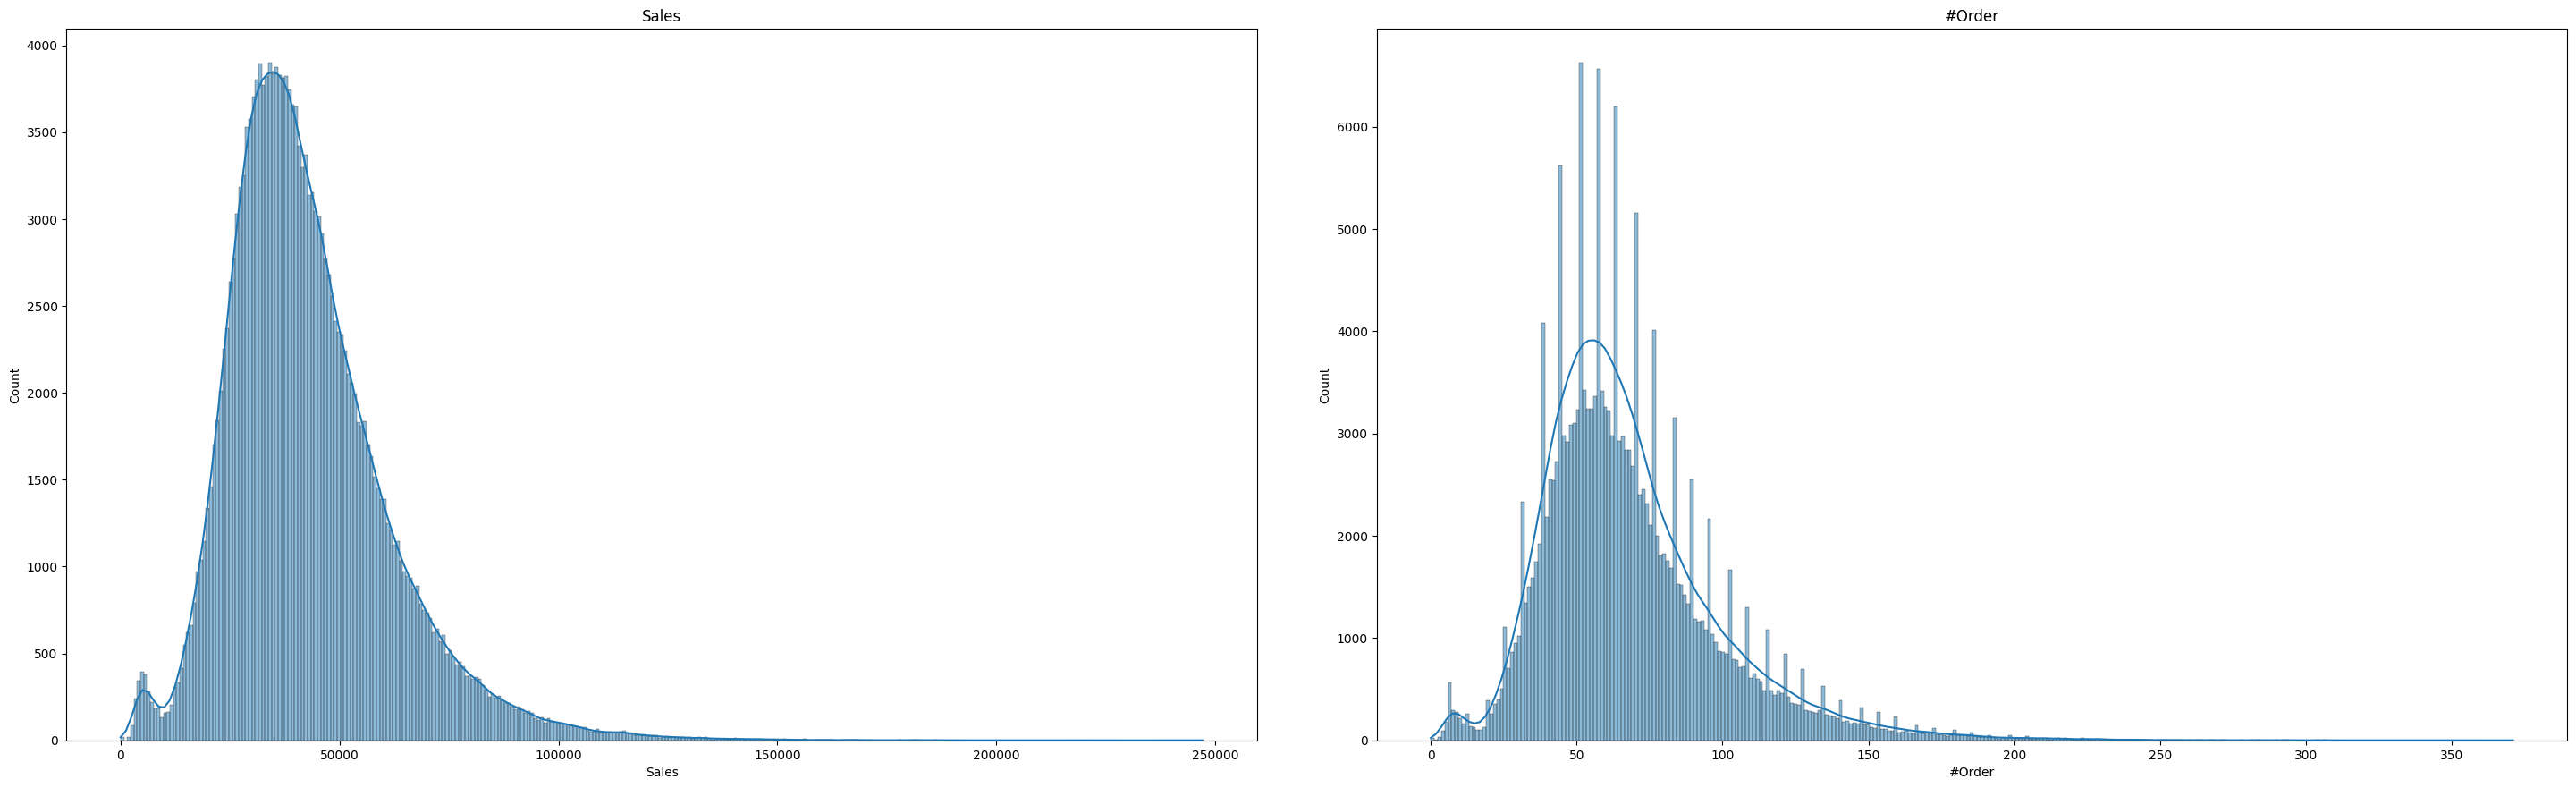


2. Bivariate Analysis : 

Observation : Discount, Store Type are bit positively correlated to Sales but not Holiday


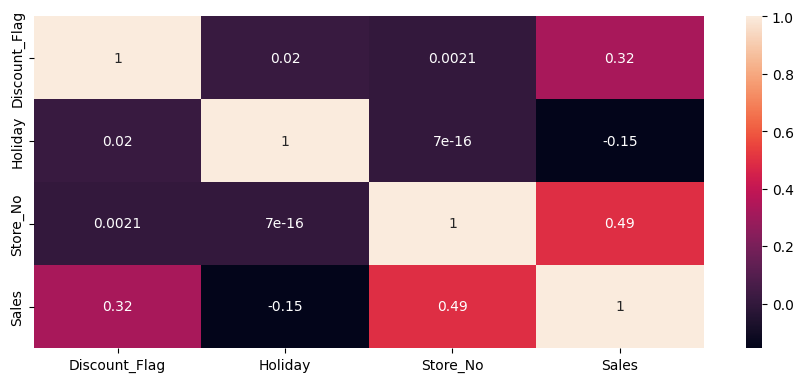


3. Trend Analysis : 

Observation : 

1. Sales improved during the year 2019
2. Sales peaked during the months May,June,July and December
3. Sales are high during first week of the month and with signs of improvement during last week


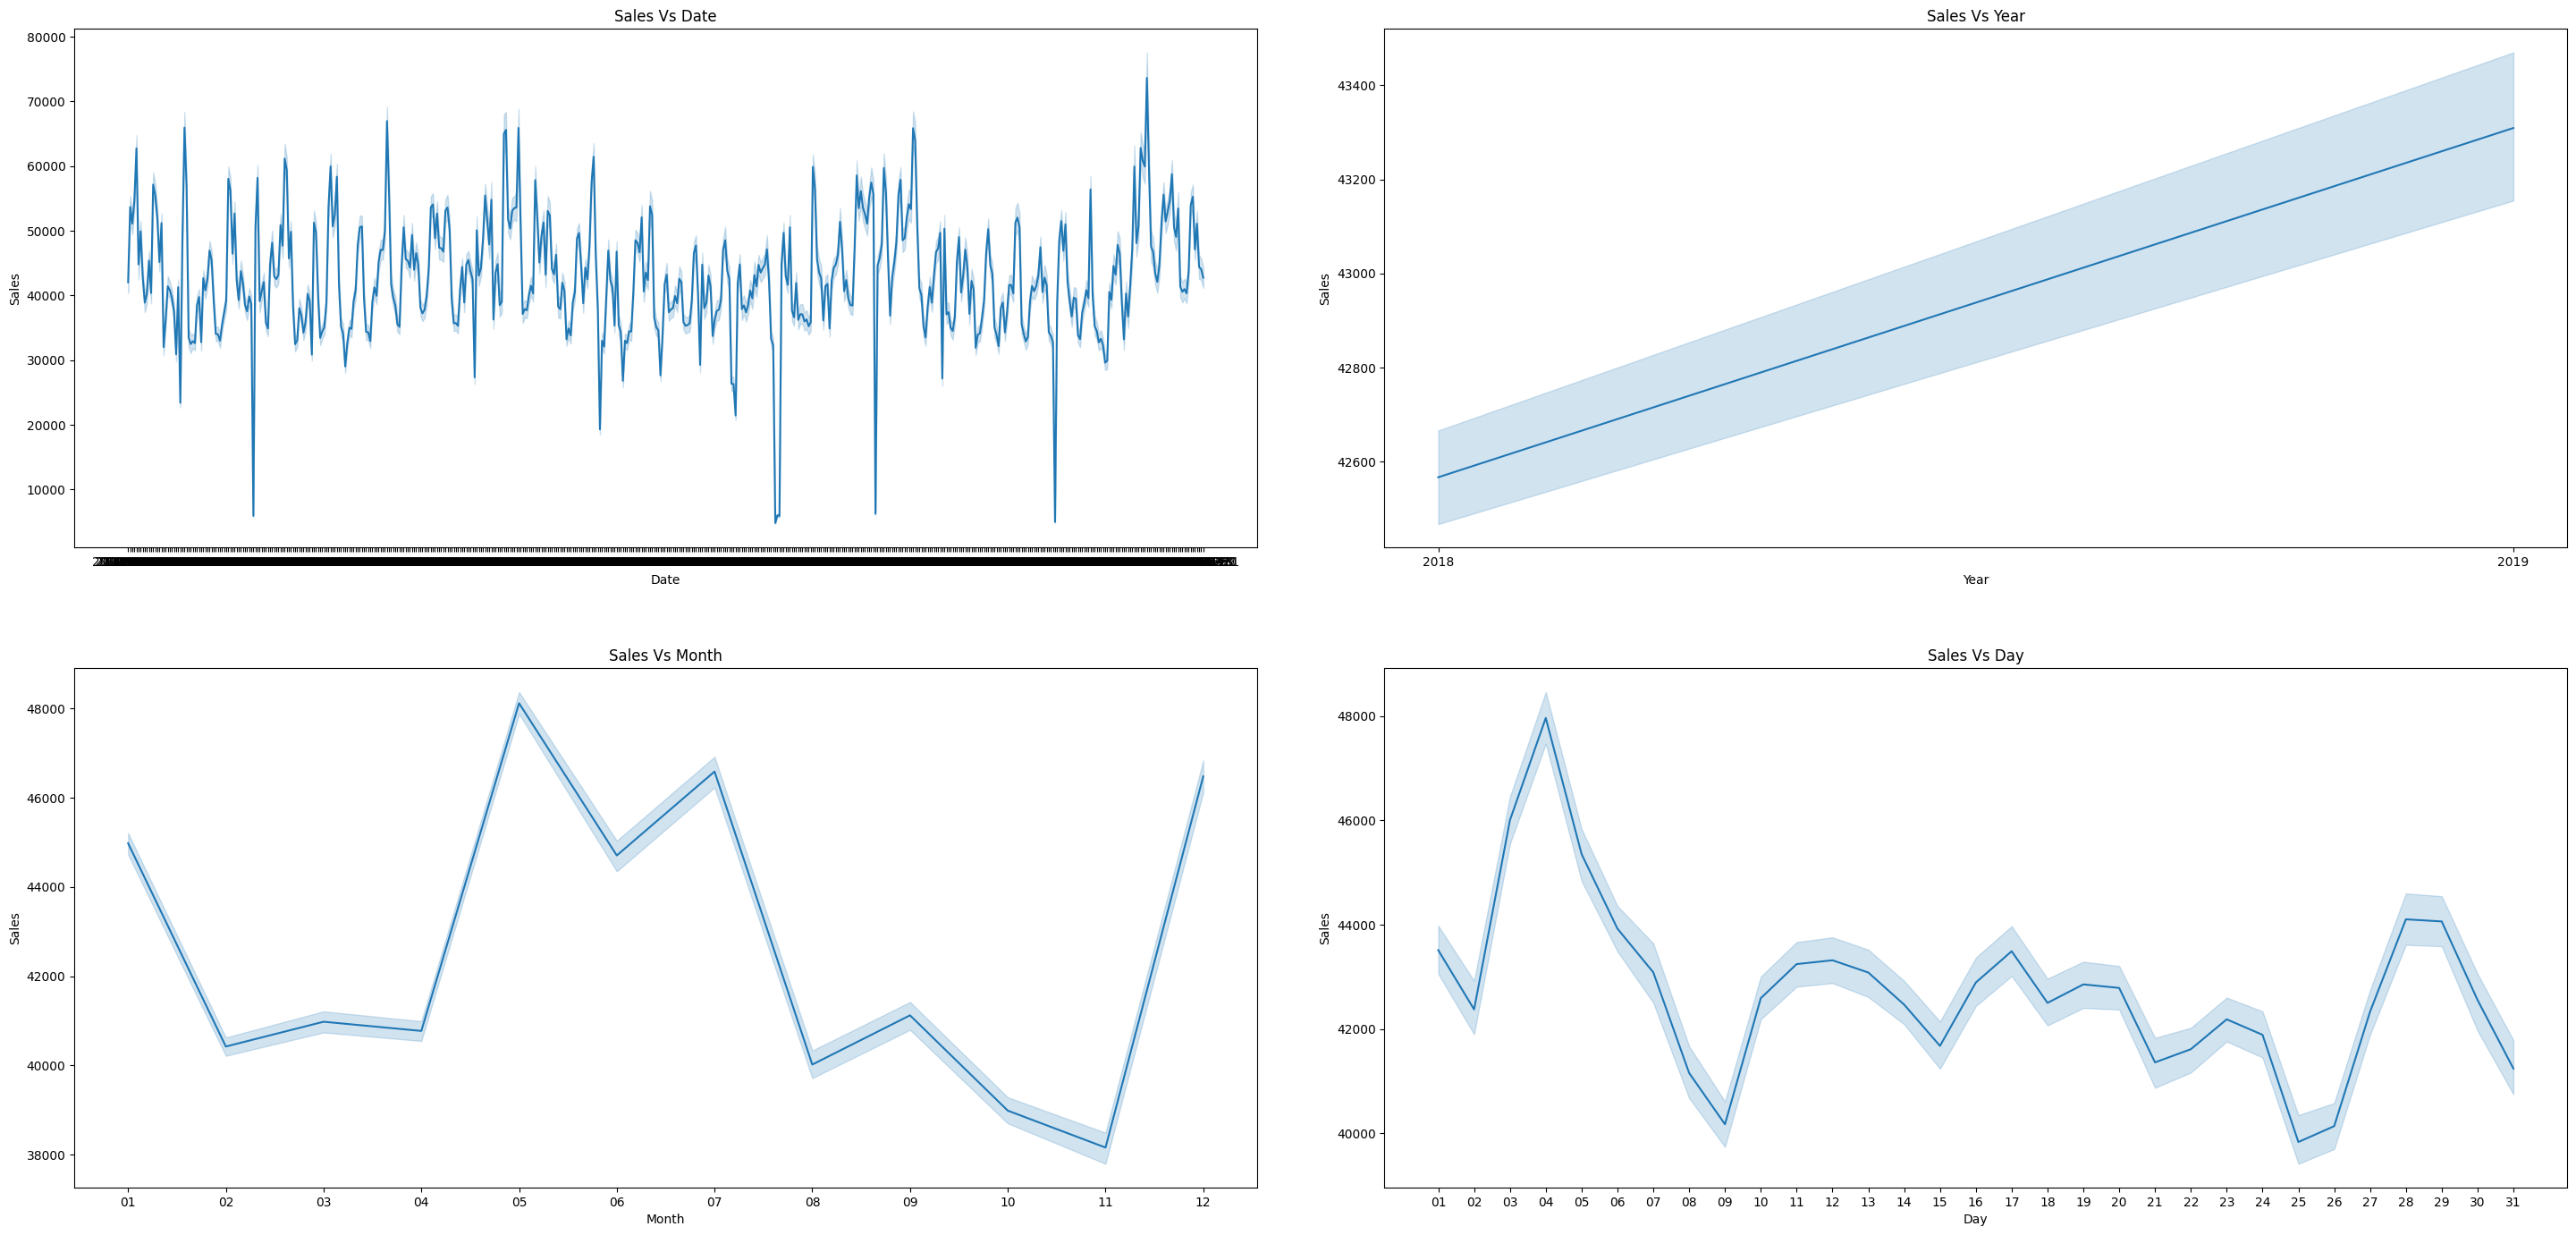


3. Comparison Plots : 

Observation : 

1. Maximum Sales corresponds to Store Type S4 and Minimum in S2
2. Maximum Sales corresponds to Location Type L2 and Minimum in L5
3. Maximum Sales corresponds to Region Code R1 and all other three Region Sales are almost at same level


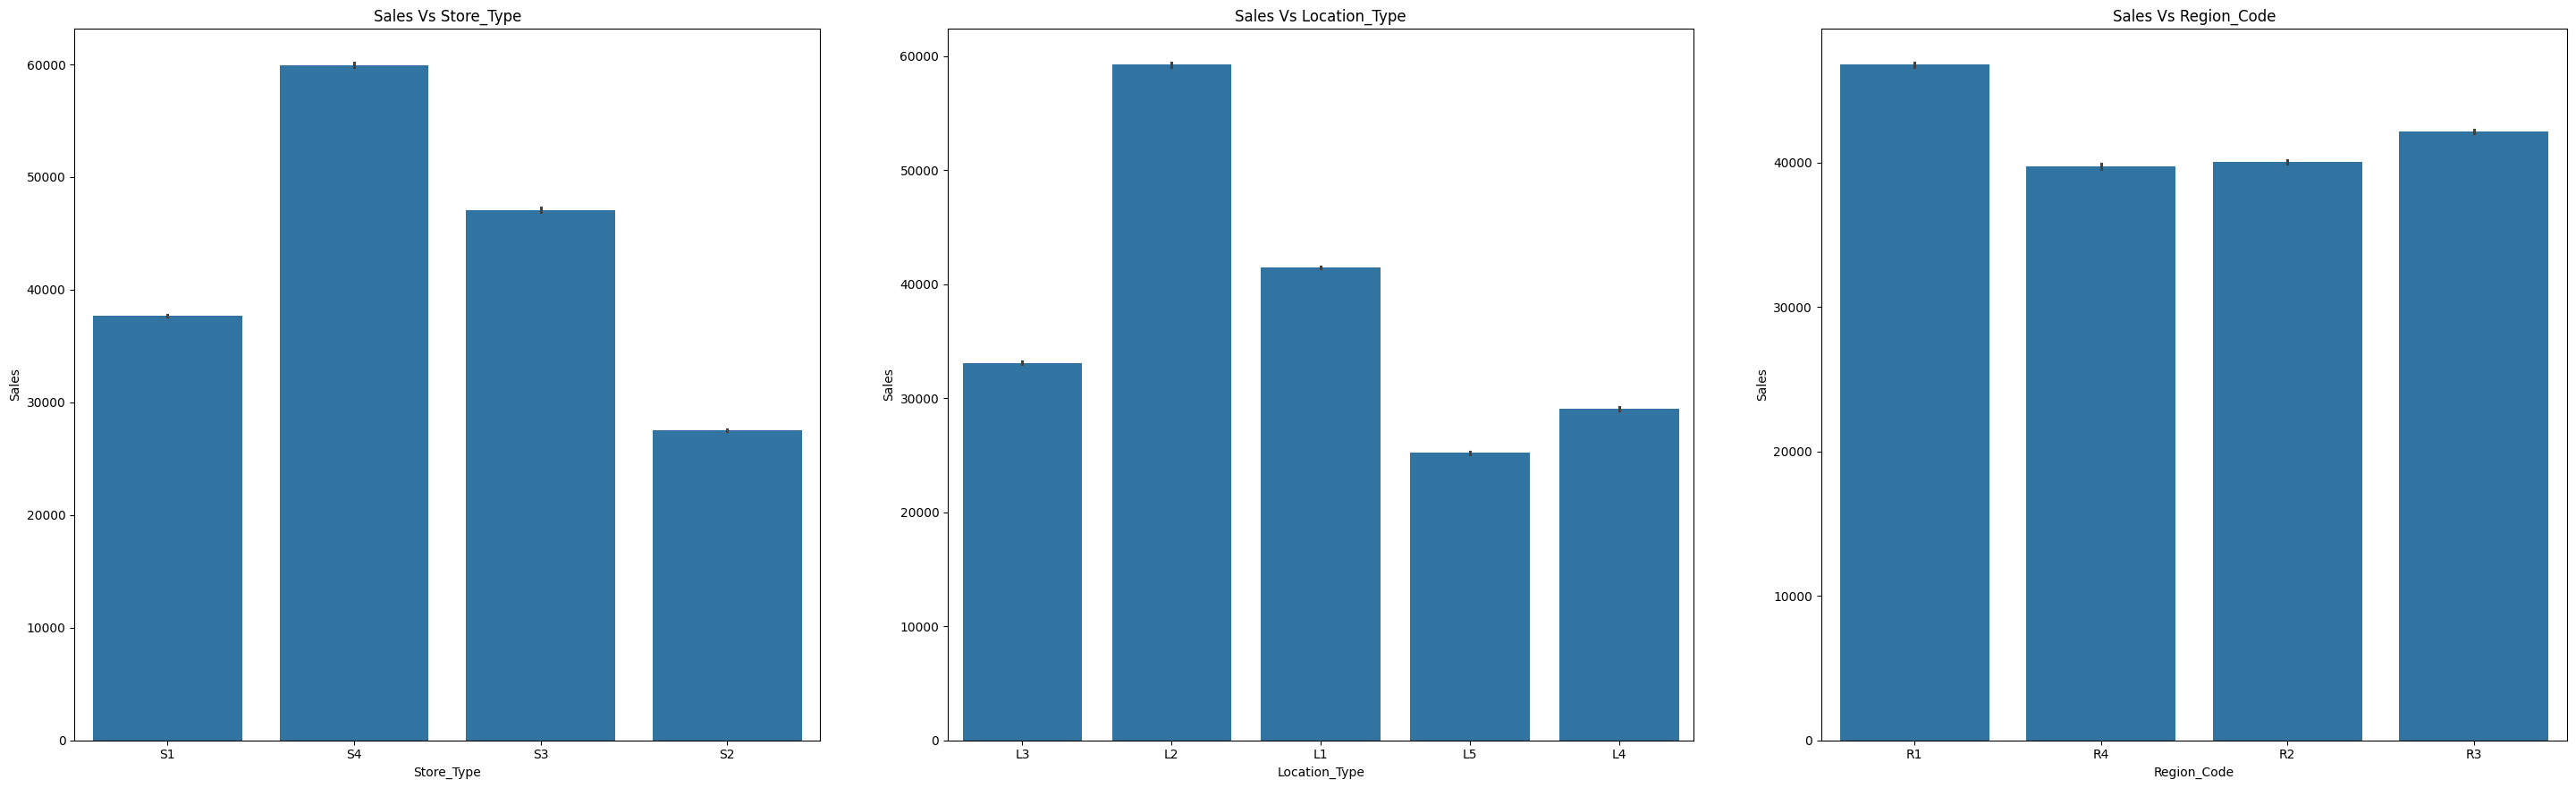

In [7]:
#Exploratory Data Analysis
uni_cols = ['Sales','#Order']
print("1. Univariate Analysis : \n")
print("Observation : Both Sales and Orders are right skewed")
fig_hist = plt.figure(figsize=(30,10))
for i in range(len(uni_cols)):
  plt.subplot(1,2,i+1)
  sns.histplot(data[uni_cols[i]], kde=True)
  plt.ylabel("Count")
  plt.title(uni_cols[i])
fig_hist.tight_layout(pad=5.0)
plt.show()
print("")
print("2. Bivariate Analysis : \n")
print("Observation : Discount, Store Type are bit positively correlated to Sales but not Holiday")
bi_cols = data[['Discount_Flag','Holiday','Store_No','Sales']]
fig_heat = plt.figure(figsize=(10,5))
sns.heatmap(bi_cols.corr(),annot=True)
fig_heat.tight_layout(pad=5.0)
plt.show()
print("")
print("3. Trend Analysis : \n")
print("Observation : \n")
print("1. Sales improved during the year 2019\n2. Sales peaked during the months May,June,July and December\n3. Sales are high during first week of the month and with signs of improvement during last week")
time_cols = ['Date','Year','Month','Day']
fig_time = plt.figure(figsize=(30,15))
for i in range(len(time_cols)):
  plt.subplot(2,2,i+1)
  sns.lineplot(data, x=time_cols[i],y='Sales')
  plt.ylabel("Sales")
  plt.title(f"Sales Vs {time_cols[i]}")
fig_time.tight_layout(pad=5.0)
plt.show()
print("")
print("3. Comparison Plots : \n")
print("Observation : \n")
print("1. Maximum Sales corresponds to Store Type S4 and Minimum in S2\n2. Maximum Sales corresponds to Location Type L2 and Minimum in L5\n3. Maximum Sales corresponds to Region Code R1 and all other three Region Sales are almost at same level")
#print("1. Sales improved during the year 2019\n2. Sales peaked during the months May,June,July and December\n3. Sales are high during first week of the month and with signs of improvement during last week")
time_cols = ['Store_Type','Location_Type','Region_Code']
fig_bar = plt.figure(figsize=(30,10))
for i in range(len(time_cols)):
  plt.subplot(1,3,i+1)
  sns.barplot(data, x=time_cols[i],y='Sales')
  plt.ylabel("Sales")
  plt.title(f"Sales Vs {time_cols[i]}")
fig_bar.tight_layout(pad=5.0)
plt.show()

As our dependent variable is 'Sales', at present we are focussing on Outlier identification and removal for it 

Lower Bound : -1798.5
Upper Bound : 84133.5
No of Outliers : 5843
Share of outliers : 3.1%
Skewness of Sales variable before Outlier treatment is : 1.2488191543387148
Kurtosis  of Sales variable before Outlier treatment is : 3.485444471324947
Skewness of Sales variable after Outlier treatment is : 0.41941360193536975
Kurtosis  of Sales variable after Outlier treatment is : -0.04671648924333516 



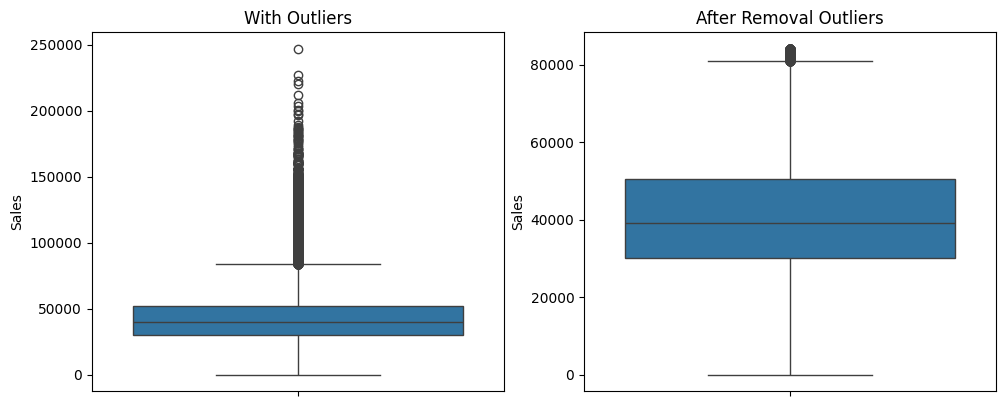

In [8]:
print("As our dependent variable is 'Sales', at present we are focussing on Outlier identification and removal for it","\n")
q1 = data["Sales"].quantile(0.25)
q3 = data["Sales"].quantile(0.75)
IQR = q3-q1

lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR

print(f"Lower Bound : {lower_bound}")
print(f"Upper Bound : {upper_bound}")

outliers = data[(data["Sales"]<lower_bound)|(data["Sales"]>upper_bound)]

print(f"No of Outliers : {len(outliers)}")
print(f"Share of outliers : {np.round((len(outliers)/len(data))*100,2)}%")

data_new = data[~((data["Sales"]<lower_bound)|(data["Sales"]>upper_bound))]

skew_coef = data["Sales"].skew()
kurt_coef = data["Sales"].kurt()
print(f"Skewness of Sales variable before Outlier treatment is : {skew_coef}")
print(f"Kurtosis  of Sales variable before Outlier treatment is : {kurt_coef}")

skew_coef = data_new["Sales"].skew()
kurt_coef = data_new["Sales"].kurt()
print(f"Skewness of Sales variable after Outlier treatment is : {skew_coef}")
print(f"Kurtosis  of Sales variable after Outlier treatment is : {kurt_coef}","\n")

fig1 = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data["Sales"])
plt.title("With Outliers")
plt.ylabel("Sales")
plt.subplot(1,2,2)
sns.boxplot(data_new["Sales"])
plt.title("After Removal Outliers")
plt.ylabel("Sales")
fig1.tight_layout(pad=0.5)
plt.show()

In [9]:
data_new.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Discount_Flag,Store_No,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018,01,01
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,4,2018,01,01
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,3,2018,01,01
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2,2018,01,01
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2,2018,01,01


In [10]:
from scipy import stats
from scipy.stats import levene


def cohen_d(group1, group2):
    # Calculate means and variances
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Calculate Pooled Standard Deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Calculate Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return abs(d)

# T Test to check impact of Discount on Sales
# Null Hypothesis : There is no impact of Discount on Sales
# Alternate Hypothesis : There is impact of Discount on Sales
alpha = 0.05
disc_yes = data_new[data_new['Discount']=='Yes']['Sales']
disc_no = data_new[data_new['Discount']=='No']['Sales']
print("1. Relation Between Discount and Sales\n")
# Checking for equal variances as its one of the assumption of T Test
# H0 : Same variances between groups
# H1 : Different variances between groups
f_stat, p_val = levene(disc_yes,disc_no)
print(f"P Value for Levene Test : {p_val}","\n")
if p_val<alpha:
  print("Reject H0")
  print("There is difference in variances of both groups, hence we are proceeding with Welch's Test","\n")
else:
  print("Failed to Reject H0")
  print("There is no difference in variances of both groups, hence we are proceeding with Student T Test","\n")


t_stat, p_value = stats.ttest_ind(disc_yes, disc_no,equal_var=False)
print(f"T Statistic : {t_stat}")
print(f"P Value : {p_value}")
if p_value<=alpha:
    print("Reject Null Hypothesis, There is impact of Discount on Sales\n")
else:
    print("Failed to Reject Null Hypothesis, There is no impact of Discount of Sales\n")

d_value = cohen_d(disc_yes, disc_no)
print(f"Cohen's d for Discount Groups: {d_value}\n")

# Holiday Vs Sales  T Test
# Null Hypothesis : There is no impact of Holiday on Sales
# Alternate Hypothesis : There is impact of Holiday on Sales
disc_yes = data_new[data_new['Holiday']==1]['Sales']
disc_no = data_new[data_new['Holiday']==0]['Sales']
print("2. Relation Between Holiday and Sales\n")
# Checking for equal variances as its one of the assumption of T Test
# H0 : Same variances between groups
# H1 : Different variances between groups
f_stat, p_val = levene(disc_yes,disc_no)
print(f"P Value for Levene Test : {p_val}","\n")
if p_val<alpha:
  print("Reject H0")
  print("There is difference in variances of both groups, hence we are proceeding with Welch's Test","\n")
else:
  print("Failed to Reject H0")
  print("There is no difference in variances of both groups, hence we are proceeding with Student T Test","\n")

t_stat, p_value = stats.ttest_ind(disc_yes, disc_no,equal_var=False)
print(f"T Statistic : {t_stat}")
print(f"P Value : {p_value}")
if p_value<=alpha:
    print("Reject Null Hypothesis, There is impact of Holiday on Sales\n")
else:
    print("Failed to Reject Null Hypothesis, There is no impact of Holiday of Sales\n")

d_value = cohen_d(disc_yes, disc_no)
print(f"Cohen's d for Holiday Groups : {d_value}")

1. Relation Between Discount and Sales

P Value for Levene Test : 1.477845032687499e-125 

Reject H0
There is difference in variances of both groups, hence we are proceeding with Welch's Test 

T Statistic : 149.30854731740908
P Value : 0.0
Reject Null Hypothesis, There is impact of Discount on Sales

Cohen's d for Discount Groups: 0.7085289642756863

2. Relation Between Holiday and Sales

P Value for Levene Test : 8.146420894645627e-84 

Reject H0
There is difference in variances of both groups, hence we are proceeding with Welch's Test 

T Statistic : -68.66089098638354
P Value : 0.0
Reject Null Hypothesis, There is impact of Holiday on Sales

Cohen's d for Holiday Groups : 0.514923189908141


Test to check relation between Store Type and Sales 



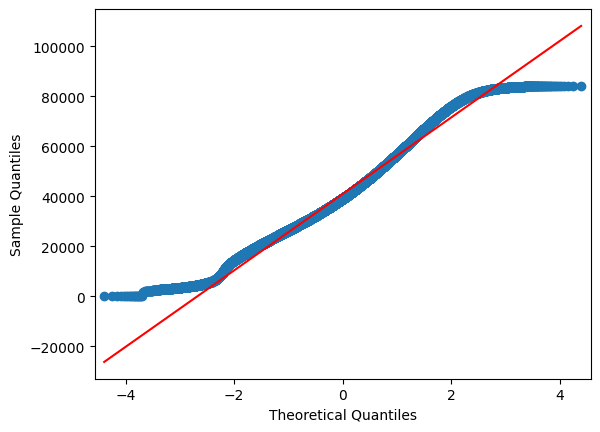


1. P Value for Shapiro : 0.12201616840822366
Failed to reject H0
Sales is in Gaussian Distribution 

  Store_Type         Sales
0         S1  37494.531516
1         S2  27522.259213
2         S3  46166.419580
3         S4  54815.612359 

2. P Value for Levene : 0.0
Reject H0
Atleast one or more group have different variances 

One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test 

3. P Value for Kruskal : 0.0
Reject H0
Atleast one or more Store Type groups have different median which indicates that Sales varies with Store Types

Cohen's d for Store Type Groups : 7.361719491045375


In [11]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import kruskal
# Store Type Vs Sales
# As we are comparing one numerical variable against categorical variable with more than 2 cardinality we proceed with ANOVA Test
# Assumptions for ANOVA :
# 1. Normality in distribution
# 2. Independent Groups
# 3. Equal Variances
def cohen_d_multi(group1, group2, group3, group4):
    # Calculate means and variances
    n1, n2, n3, n4 = len(group1), len(group2), len(group3), len(group4)
    var1, var2, var3, var4 = np.var(group1, ddof=1), np.var(group2, ddof=1), np.var(group3, ddof=1), np.var(group4, ddof=1)
    
    # Calculate Pooled Standard Deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2 + (n3 - 1) * var3 + (n4 - 1) * var4) / (n1 + n2+ n3+ n4 - 4))
    
    # Calculate Cohen's d
    d = (np.mean(group1) - np.mean(group2) - np.mean(group3) - np.mean(group4)) / pooled_std
    return abs(d)

print("Test to check relation between Store Type and Sales","\n")
qqplot(data_new["Sales"],line="s")
plt.show()
print()

# 1. Lets Test Normality of data with Shapiro Wilk Test
np.random.seed(42)
count_subset = data_new["Sales"].sample(50)

s_stat, p_value = shapiro(count_subset)
print(f"1. P Value for Shapiro : {p_value}")
alpha = 0.05
# H0 : Data is in Gaussian Distribution
# H1 : Data is not in Gaussian Distribution
if p_value<alpha:
  print("Reject H0")
  print("Sales is not in Gaussian Distribution","\n")
else:
  print("Failed to reject H0")
  print("Sales is in Gaussian Distribution","\n")


# 3. Testing variances of the groups usinge levene test

print(data_new.groupby("Store_Type")["Sales"].mean().reset_index(),"\n")

store_1 = data_new[data_new["Store_Type"]=='S1']["Sales"]
store_2 = data_new[data_new["Store_Type"]=='S2']["Sales"]
store_3 = data_new[data_new["Store_Type"]=='S3']["Sales"]
store_4 = data_new[data_new["Store_Type"]=='S4']["Sales"]

#H0 : All groups have same variances
#H1 : Atleat one or more group have different variances
l_stat,p_value = levene(store_1,store_2,store_3,store_4)
print(f"2. P Value for Levene : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more group have different variances","\n")
else:
  print("Failed to reject H0")
  print("All groups have same variances","\n")

print("One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test","\n")

# Kruskal Wallis Test to check if rental bike usage is same in all seasons or different
#H0 : Rental Bikes usage is same for all seasons
#H1 : Atleast one or more season groups have different rental bike usage.
f_stat, p_val = kruskal(store_1,store_2,store_3,store_4)
print(f"3. P Value for Kruskal : {p_val}")
if p_val<alpha:
  print("Reject H0")
  print("Atleast one or more Store Type groups have different median which indicates that Sales varies with Store Types\n")
else:
  print("Failed to Reject H0")
  print("All Stores have same median which indicates that Sales are not dependent on Store Types\n")

d_value = cohen_d_multi(store_1, store_2,store_3,store_4)
print(f"Cohen's d for Store Type Groups : {d_value}")

In [12]:
# Region Vs Sales
# As we are comparing one numerical variable against categorical variable with more than 2 cardinality we proceed with ANOVA Test
# Assumptions for ANOVA :
# 1. Normality in distribution
# 2. Independent Groups
# 3. Equal Variances

print("Test to check relation between Region and Sales","\n")

# 3. Testing variances of the groups usinge levene test

print(data_new.groupby("Region_Code")["Sales"].mean().reset_index(),"\n")

store_1 = data_new[data_new["Region_Code"]=='R1']["Sales"]
store_2 = data_new[data_new["Region_Code"]=='R2']["Sales"]
store_3 = data_new[data_new["Region_Code"]=='R3']["Sales"]
store_4 = data_new[data_new["Region_Code"]=='R4']["Sales"]

#H0 : All groups have same variances
#H1 : Atleat one or more group have different variances
l_stat,p_value = levene(store_1,store_2,store_3,store_4)
print(f"2. P Value for Levene : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more group have different variances","\n")
else:
  print("Failed to reject H0")
  print("All groups have same variances","\n")

print("One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test","\n")

# Kruskal Wallis Test to check if rental bike usage is same in all seasons or different
#H0 : Rental Bikes usage is same for all seasons
#H1 : Atleast one or more season groups have different rental bike usage.
f_stat, p_val = kruskal(store_1,store_2,store_3,store_4)
print(f"3. P Value for Kruskal : {p_val}")
if p_val<alpha:
  print("Reject H0")
  print("Atleast one or more Region groups have different median which indicates that Sales varies with Region")
else:
  print("Failed to Reject H0")
  print("All Regions have same median which indicates that Sales are not dependent on Region")

d_value = cohen_d_multi(store_1, store_2,store_3,store_4)
print(f"Cohen's d for Store Type Groups : {d_value}")

Test to check relation between Region and Sales 

  Region_Code         Sales
0          R1  43509.306473
1          R2  39006.130762
2          R3  40993.749355
3          R4  38832.439406 

2. P Value for Levene : 0.0
Reject H0
Atleast one or more group have different variances 

One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test 

3. P Value for Kruskal : 0.0
Reject H0
Atleast one or more Region groups have different median which indicates that Sales varies with Region
Cohen's d for Store Type Groups : 4.9677075848989185


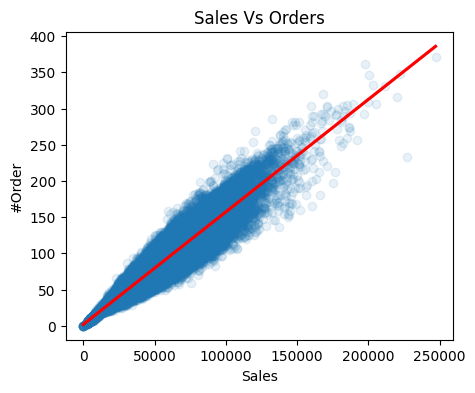


Its evident from Scatter Plot that there is linear relationship between Sales and Orders


In [13]:
# Relation between Sales and Orders
plt.figure(figsize=(5,4))
sns.regplot(data=data, x='Sales', y='#Order', 
            scatter_kws={'alpha':0.1},
            line_kws={'color':'red'})

plt.title("Sales Vs Orders")
plt.show()
print("")
print("Its evident from Scatter Plot that there is linear relationship between Sales and Orders")

In [14]:
obj_cols = data_new.select_dtypes(include=['object']).columns.tolist()
uniq_values = data_new[obj_cols].nunique().reset_index()
uniq_values.rename(columns={"index":"column_name",0:"uniq_value_cnt"},inplace=True)
uniq_values

,column_name,uniq_value_cnt
0,ID,182497
1,Store_Type,4
2,Location_Type,5
3,Region_Code,4
4,Date,516
5,Discount,2
6,Store_No,4
7,Year,2
8,Month,12
9,Day,31


In [15]:
data_new['Location_No'] = data_new['Location_Type'].apply(lambda x : x[1:]).astype(int)
data_new['Region_No'] = data_new['Region_Code'].apply(lambda x : x[1:]).astype(int)
data_new['Date'] = pd.to_datetime(data_new['Date'])
data_new['Store_No'] = data_new['Store_No'].astype(int)
data_new['Year'] = data_new['Year'].astype(int)
data_new['Month'] = data_new['Month'].astype(int)
data_new['Day'] = data_new['Day'].astype(int)

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182497 entries, 0 to 188339
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             182497 non-null  object        
 1   Store_id       182497 non-null  int64         
 2   Store_Type     182497 non-null  object        
 3   Location_Type  182497 non-null  object        
 4   Region_Code    182497 non-null  object        
 5   Date           182497 non-null  datetime64[ns]
 6   Holiday        182497 non-null  int64         
 7   Discount       182497 non-null  object        
 8   #Order         182497 non-null  int64         
 9   Sales          182497 non-null  float64       
 10  Discount_Flag  182497 non-null  int64         
 11  Store_No       182497 non-null  int64         
 12  Year           182497 non-null  int64         
 13  Month          182497 non-null  int64         
 14  Day            182497 non-null  int64         
 15  Locat

In [17]:
model_data = data_new[['Holiday','Sales','Discount_Flag','Date',
                       'Store_No','Year','Month','Day',
                       'Location_No','Region_No']]

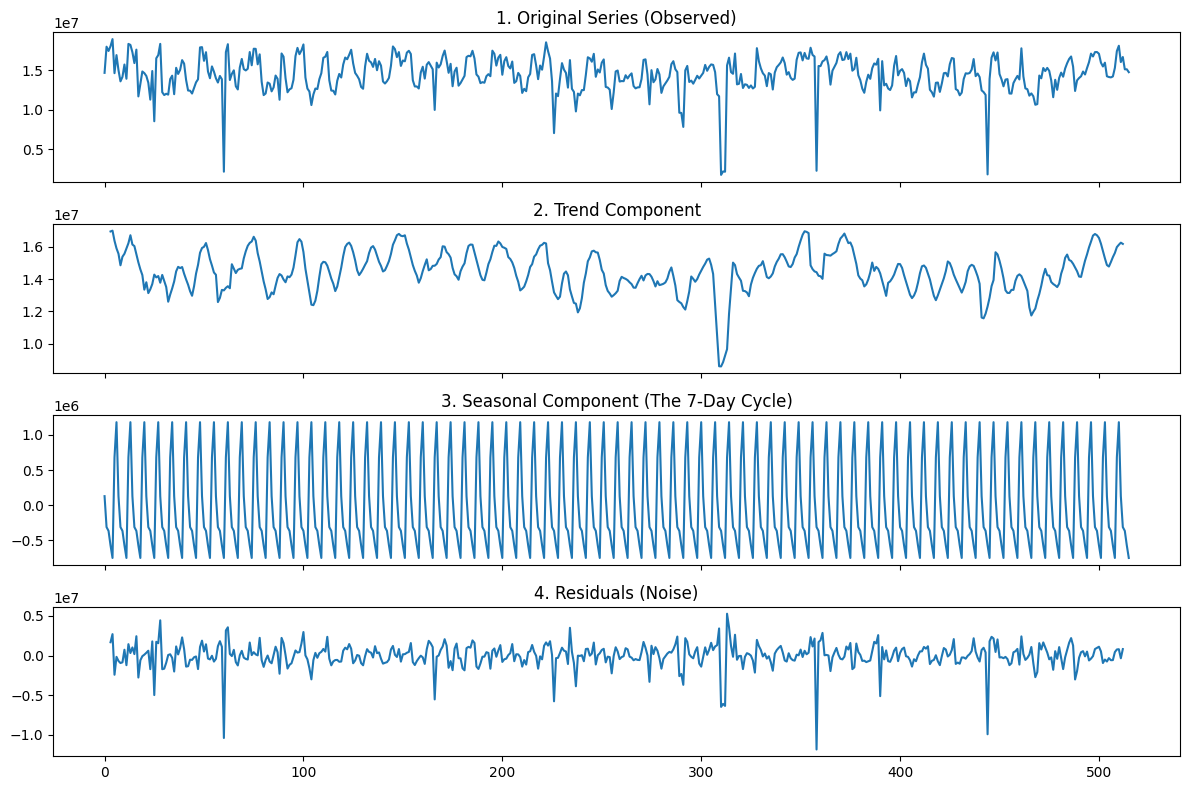

Observation:

1. From above decomposition, we can infer that there is not actual trend in the data apart from a dip at one point.

2. Seasonality in the data is observed with period of 7 day.

3. We have several downward spikes in residuals. Because they are mostly negative, it suggests that on those specific days, the actual value was significantly lower than what the trend and 7-day cycle predicted. These are Anomalies or Black Swan events.

4. Now lets proceed with ADF test to confirm our visual inferences.



In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Seasonal Decomposition to understand the trend and seasonality in the data
agg_en_df = model_data.groupby('Date')['Sales'].sum().reset_index()
#agg_en_df['count'] = agg_en_df['count']/1000000
agg_en_df['Month'] = pd.to_datetime(agg_en_df['Date']).dt.month
agg_en_df['Year'] = pd.to_datetime(agg_en_df['Date']).dt.year
decomposition = seasonal_decompose(agg_en_df['Sales'],
                                   model='additive',
                                   period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=ax1, title='1. Original Series (Observed)')
decomposition.trend.plot(ax=ax2, title='2. Trend Component')
decomposition.seasonal.plot(ax=ax3, title='3. Seasonal Component (The 7-Day Cycle)')
decomposition.resid.plot(ax=ax4, title='4. Residuals (Noise)')

plt.tight_layout()
plt.show()

print("Observation:\n")

print("1. From above decomposition, we can infer that there is not actual trend in the data apart from a dip at one point.\n")

print("2. Seasonality in the data is observed with period of 7 day.\n")

print("3. We have several downward spikes in residuals. Because they are mostly negative, it suggests that on those specific days, the actual value was significantly lower than what the trend and 7-day cycle predicted. These are Anomalies or Black Swan events.\n")

print("4. Now lets proceed with ADF test to confirm our visual inferences.\n")

In [19]:
result = adfuller(agg_en_df['Sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

alpha = 0.05 # Confidence level of 95%

if result[1]<alpha:
  print("Reject Null Hypothesis, The data is stationary\n")
else:
  print("Failed to Reject Null Hypothesis, The data is non stationary\n")

print("Observation : From above statistical test we can confirm that Sales data is stationary and hence for our ARIMA model lets consider the Intregrated order d = 0")

ADF Statistic: -3.814008
p-value: 0.002767
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Reject Null Hypothesis, The data is stationary

Observation : From above statistical test we can confirm that Sales data is stationary and hence for our ARIMA model lets consider the Intregrated order d = 0


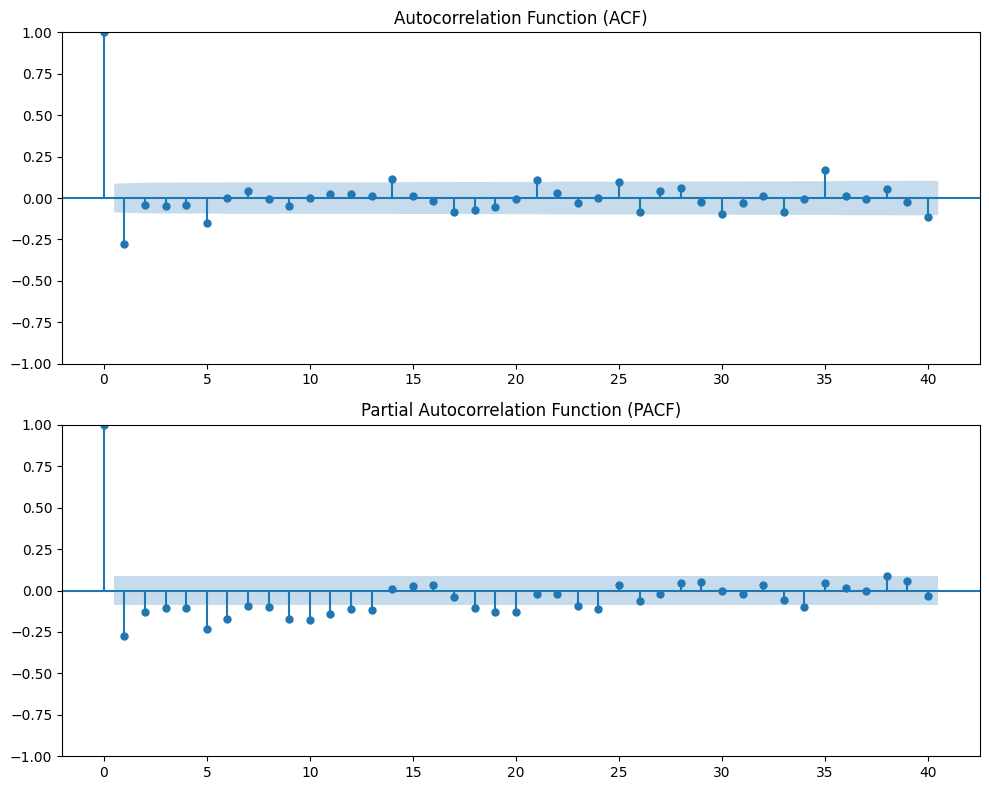

Observation:

1. From PACF plot, The spike at Lag 1 is highly significant. After Lag 1, all spikes are either less than at Lag 1 or within the blue band. The plot cuts off after Lag 1. Hence AR order p=1

2. From ACF plot, The spike at Lag 1 is highly significant. After Lag 1, all spikes are within the blue band. The plot cuts off after Lag 1. Hence MA order q=1.

3. As per ADF test we already concluded that data is stationary and d=0.


In [20]:
diff_series = agg_en_df['Sales'].diff(periods=1).dropna()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(diff_series,
         ax=axes[0],
         lags=40,  # Show enough lags to see the first few non-seasonal and seasonal (7, 14, 21...)
         title='Autocorrelation Function (ACF)')

# 3b. Plot the PACF (for p and P)
plot_pacf(diff_series,
          ax=axes[1],
          lags=40,
          method='ywm', # Yule-Walker is often a good choice for PACF
          title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

print("Observation:\n")

print("1. From PACF plot, The spike at Lag 1 is highly significant. After Lag 1, all spikes are either less than at Lag 1 or within the blue band. The plot cuts off after Lag 1. Hence AR order p=1\n")

print("2. From ACF plot, The spike at Lag 1 is highly significant. After Lag 1, all spikes are within the blue band. The plot cuts off after Lag 1. Hence MA order q=1.\n")

print("3. As per ADF test we already concluded that data is stationary and d=0.")


C:\Users\jteja\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jteja\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- Model Summary (SARIMAX) ---
                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                  -1.937
Date:                           Sat, 27 Dec 2025   AIC                             13.874
Time:                                   16:04:46   BIC                             33.149
Sample:                               01-01-2018   HQIC                            21.547
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5081      0.056      9.006      0.000       0.397       0.619
ma.L1      

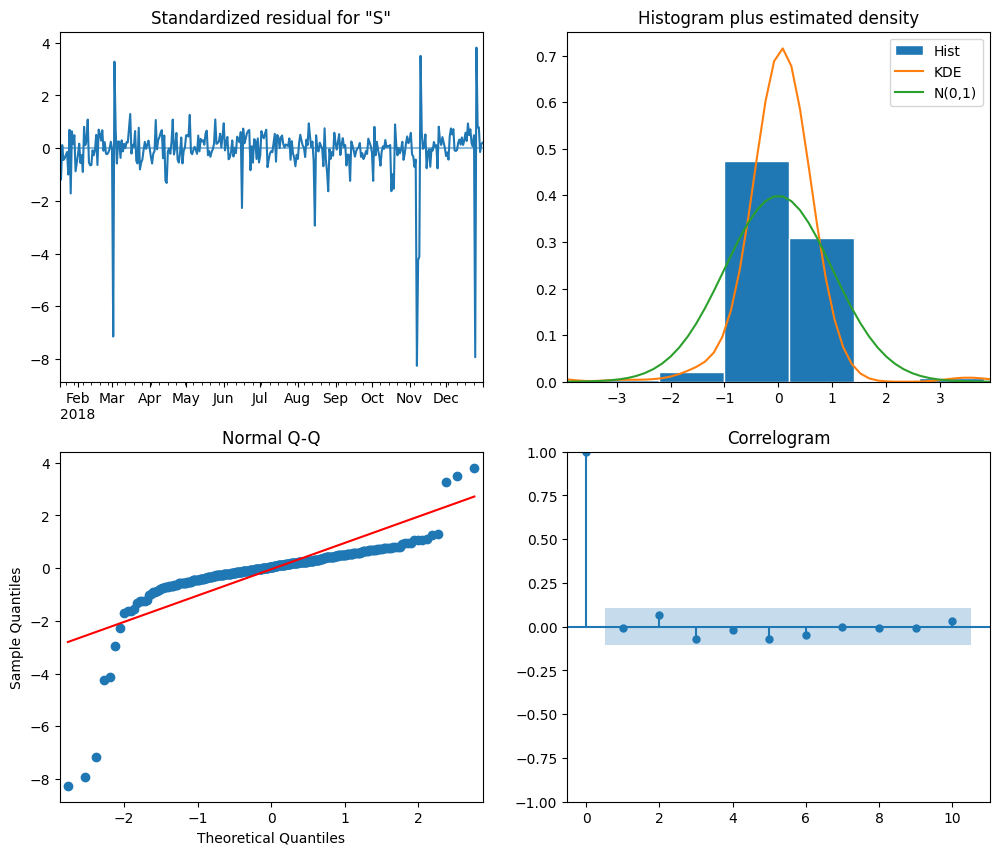


--- Evaluation Metrics ---
Root Mean Squared Error (RMSE): 2125574.75
Mean Absolute Percentage Error (MAPE): 14.99%


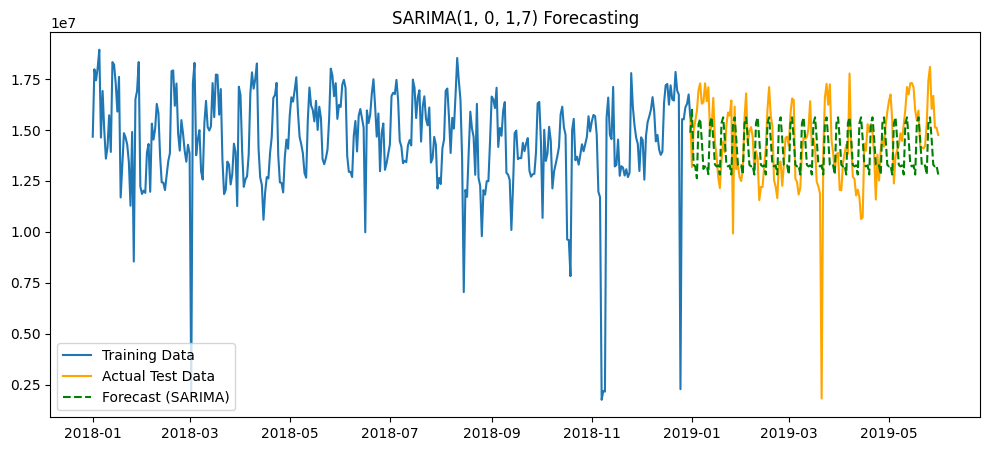

In [21]:
ts_data = agg_en_df[['Date','Sales']]
ts_data['Sales'] = np.log1p(ts_data['Sales'])
ts_data.set_index('Date',inplace=True)

split_point = '2018-12-31'
train_data = ts_data[:split_point]
test_data = ts_data[split_point:]
# Building SARIMAX Model without Exogenous variable


model = SARIMAX(train_data,
          order=(1, 0, 1), 
          seasonal_order=(1, 1, 1, 7), 
          enforce_stationarity=False,
          enforce_invertibility=False)

results = model.fit(disp=False)

print("--- Model Summary (SARIMAX) ---")
print(results.summary())

print("\n--- Model Diagnostics Plot ---")
results.plot_diagnostics(figsize=(12, 10))
plt.show()
forecast_start = test_data.index[0]
forecast_end = test_data.index[-1]

predictions = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=False)
forecast_values = predictions.predicted_mean
real_actuals = np.expm1(test_data)
real_forecast = np.expm1(forecast_values)
real_train = np.expm1(train_data)

# Calculate Error Metrics
rmse = np.sqrt(mean_squared_error(real_actuals, real_forecast))
# MAPE (Mean Absolute Percentage Error) is useful for interpretation
actual = np.array(real_actuals).flatten()
pred = np.array(real_forecast).flatten()

# Now run your MAPE calculation
mape = np.mean(np.abs((actual - pred) / actual)) * 100

#mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
#mape = (np.sum(np.abs(test_data - forecast_values)) / np.sum(test_data)) * 100

print(f"\n--- Evaluation Metrics ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Plot Actual vs. Forecast
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, real_train, label='Training Data')
plt.plot(test_data.index, real_actuals, label='Actual Test Data', color='orange')
plt.plot(test_data.index, real_forecast, label='Forecast (SARIMA)', color='green', linestyle='--')
plt.title('SARIMA(1, 0, 1,7) Forecasting')
plt.legend()
plt.show()

C:\Users\jteja\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jteja\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- Model Summary (SARIMAX) ---
                                     SARIMAX Results                                     
Dep. Variable:                         Sales_Win   No. Observations:                  366
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                 285.290
Date:                           Sat, 27 Dec 2025   AIC                           -556.580
Time:                                   16:04:52   BIC                           -529.575
Sample:                               01-01-2018   HQIC                          -545.831
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Discount_Flag     0.1420      0.015      9.554      0.000       0.113       0.171
Ho

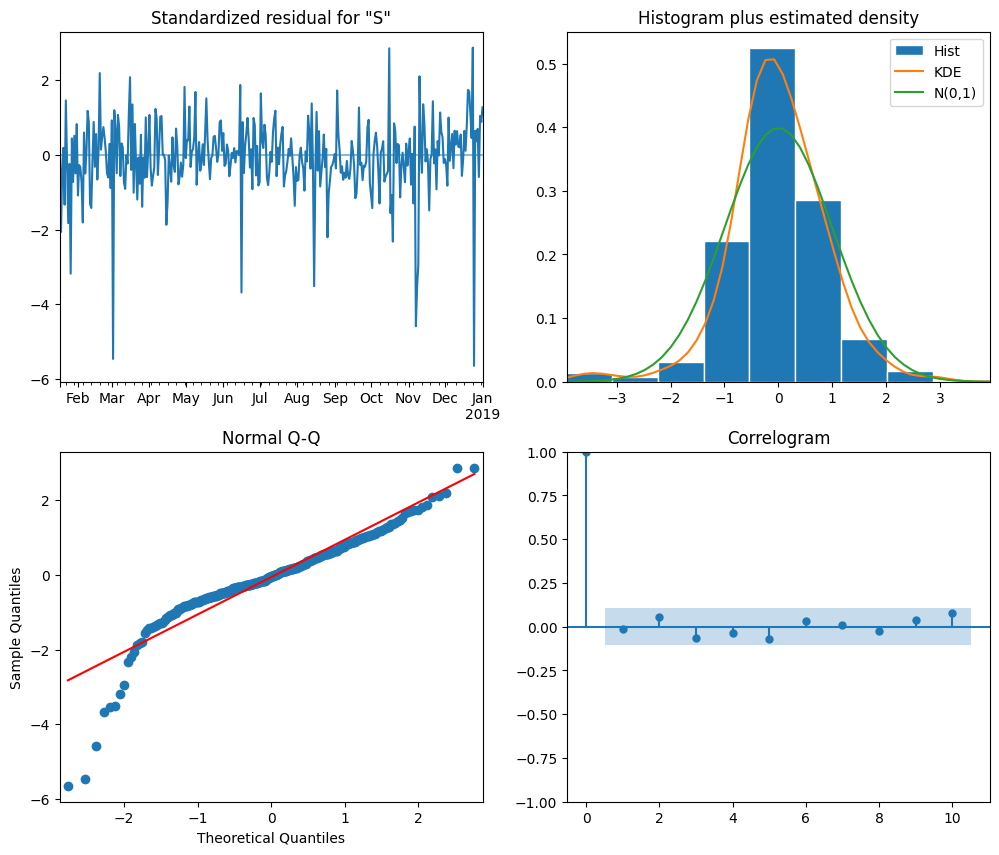


--- Evaluation Metrics ---
Root Mean Squared Error (RMSE): 1561019.85
Mean Absolute Percentage Error (MAPE): 8.80%


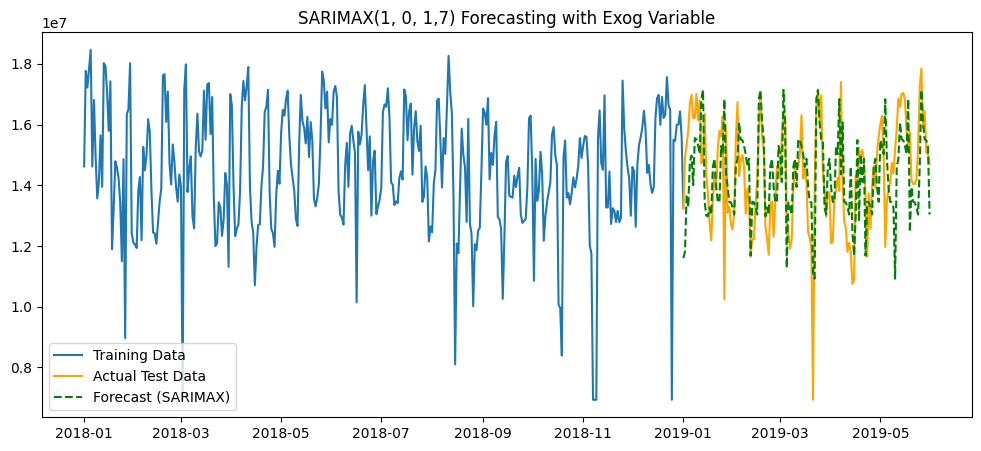



Observation:

1. As per the decomposition plots we can see that there is Seasonal Component to Data, Hence SARIMAX is out best bet to proceed with.

2. At Stage 1, tried SARIMA without exogenous variables. It resulted in MAPE of 14.99% 

3. At Stage 1, we can also see Kurtosis coefficient being 35 and sudden unusual spiked affecting the model performance

4. At Stage 2, exogenous variables have been introduced and Sales data has been winsorized at 5%.

5. Key Performance Metrics of Version 2 of Model are:

    a) MAPE : 8.80%, which indicates on a given day the predicted sales are off by 9%

    b) Prob(Q) : 0.77, which means there is essentially zero autocorrelation left in the residuals. The model has cleaned the data perfectly

    c) Prob(H) = 0.20, which means the variance of your errors is constant over time. The model is just as accurate in December as it was in January.

    d) Coefficients of Exogenous Variable : Discount_Flag (0.1420), Holiday (-0.1769) which indicates that

In [22]:
from scipy.stats.mstats import winsorize

def calculate_mape_no_zeros(actual, forecast):

  actual = np.array(actual).ravel()
  forecast = np.array(forecast)

  non_zero_mask = actual != 0

  actual_non_zero = actual[non_zero_mask]
  forecast_non_zero = forecast[non_zero_mask]

  if len(actual_non_zero) == 0:
      return np.nan
  ape = np.abs((actual_non_zero - forecast_non_zero) / actual_non_zero)
  mape = np.mean(ape) * 100
  return mape
model_data['Sales_Win'] = winsorize(model_data['Sales'], limits=[0.05, 0.05])
agg_en_df = model_data.groupby('Date')['Sales_Win'].sum().reset_index()
#agg_en_df['Sales'] = agg_en_df['Sales']/1000000
agg_en_df['Sales_Win'] = np.log1p(agg_en_df['Sales_Win'])
agg_en_df['Month'] = pd.to_datetime(agg_en_df['Date']).dt.month
agg_en_df['Year'] = pd.to_datetime(agg_en_df['Date']).dt.year

ts_data = agg_en_df[['Date','Sales_Win']]
#ts_data['Sales'] = np.log(ts_data['Sales'])
ts_data.set_index('Date',inplace=True)


# agg_en_exog = model_data[['Date','Holiday']]
# agg_en_exog.drop_duplicates(inplace=True,keep='first')
# agg_en_exog.set_index('Date',inplace=True)
disc_data = model_data.groupby('Date')['Discount_Flag'].mean().reset_index()
disc_data['Discount_Flag'] = disc_data['Discount_Flag'].round()
holi_data = model_data.groupby('Date')['Holiday'].mean().reset_index()
exog_data = pd.merge(disc_data,holi_data,how='inner')
exog_data = exog_data.set_index('Date')

split_point = '2019-01-01'
train_data = ts_data[:split_point]
exog_train = exog_data[:split_point]

test_data = ts_data[split_point:]
exog_test = exog_data[split_point:]

model = SARIMAX(train_data,
                exog=exog_train,
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

print("--- Model Summary (SARIMAX) ---")
print(results.summary())

print("\n--- Model Diagnostics Plot ---")
results.plot_diagnostics(figsize=(12, 10))
plt.show()
forecast_start = exog_test.index[1]
forecast_end = exog_test.index[-1]

predictions = results.get_prediction(start='2019-01-01', end='2019-05-31', exog=exog_test.iloc[:150],dynamic=False)
forecast_values = predictions.predicted_mean

# Calculate Error Metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
# MAPE (Mean Absolute Percentage Error) is useful for interpretation
mape = calculate_mape_no_zeros(test_data,forecast_values)

final_forecast = np.exp(forecast_values)
final_train = np.exp(train_data)
final_test = np.exp(test_data)

# Calculate Error Metrics
rmse = np.sqrt(mean_squared_error(final_test, final_forecast))
# MAPE (Mean Absolute Percentage Error) is useful for interpretation
mape = calculate_mape_no_zeros(final_test, final_forecast)
print(f"\n--- Evaluation Metrics ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Plot Actual vs. Forecast
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, final_train, label='Training Data')
plt.plot(test_data.index, final_test, label='Actual Test Data', color='orange')
plt.plot(test_data.index, final_forecast, label='Forecast (SARIMAX)', color='green', linestyle='--')
plt.title('SARIMAX(1, 0, 1,7) Forecasting with Exog Variable')
plt.legend()
plt.show()
print("")
print("")
print("Observation:\n")
print("1. As per the decomposition plots we can see that there is Seasonal Component to Data, Hence SARIMAX is out best bet to proceed with.\n")
print("2. At Stage 1, tried SARIMA without exogenous variables. It resulted in MAPE of 14.99% \n")
print("3. At Stage 1, we can also see Kurtosis coefficient being 35 and sudden unusual spiked affecting the model performance\n")
print("4. At Stage 2, exogenous variables have been introduced and Sales data has been winsorized at 5%.\n")
print("5. Key Performance Metrics of Version 2 of Model are:\n")
print("    a) MAPE : 8.80%, which indicates on a given day the predicted sales are off by 9%\n")
print("    b) Prob(Q) : 0.77, which means there is essentially zero autocorrelation left in the residuals. The model has cleaned the data perfectly\n")
print("    c) Prob(H) = 0.20, which means the variance of your errors is constant over time. The model is just as accurate in December as it was in January.\n")
print("    d) Coefficients of Exogenous Variable : Discount_Flag (0.1420), Holiday (-0.1769) which indicates that on Discounts push sales up by 14/2 % and holidays drag down the sales by 18%\n ")
print("6. For Extreme Events: On the 10 biggest days of the year (Major holidays/huge sales), the model will likely under-predict because Sales have been capped on the training data. Manual Buffer needs to be applied for those specific high-peak dates\n")

In [23]:
import joblib
joblib.dump(results, 'sarimax_model.pkl')

['sarimax_model.pkl']